# List of Processes

In [1]:
import numpy as np

from scipy.stats import poisson
from scipy import stats

import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

## #1. Wiener Process

Text(0, 0.5, 'W(t)')

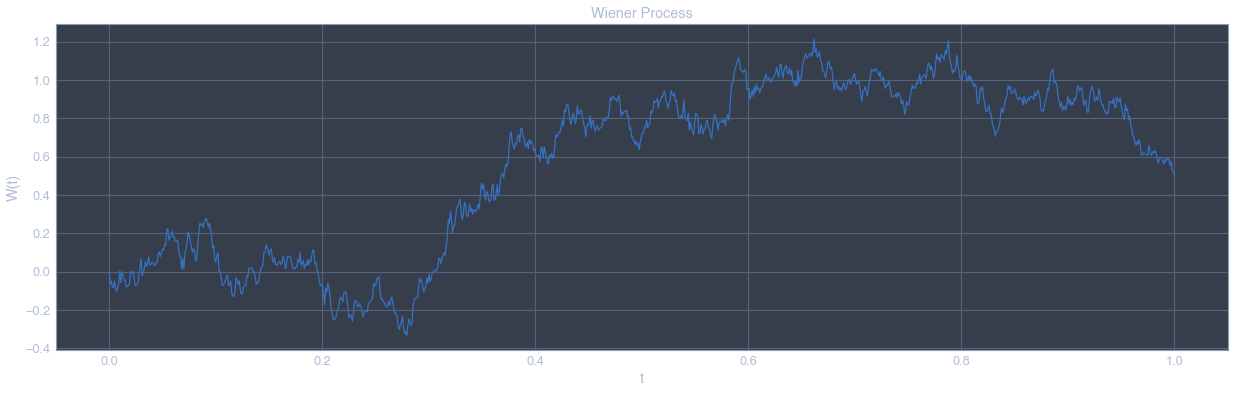

In [2]:
def wiener_process(T=1, N=1_000, mu=0, sigma=1):
    dt = T / N
    t = np.linspace(0, T, N)
    
    # Нормально распределенные приращения
    dW = np.random.normal(mu*dt, sigma*np.sqrt(dt), N)
    
    # Кумулятивная сумма (винеровский процесс)
    W = np.cumsum(dW)
    
    return t, W


t, W = wiener_process(T=1, N=1_000)

plt.figure(figsize=(21, 6))
plt.plot(t, W)
plt.title('Wiener Process')
plt.xlabel('t')
plt.ylabel('W(t)')

Statistical properties at the moment T=1:
Mean: -0.4521
Variance: 0.8497


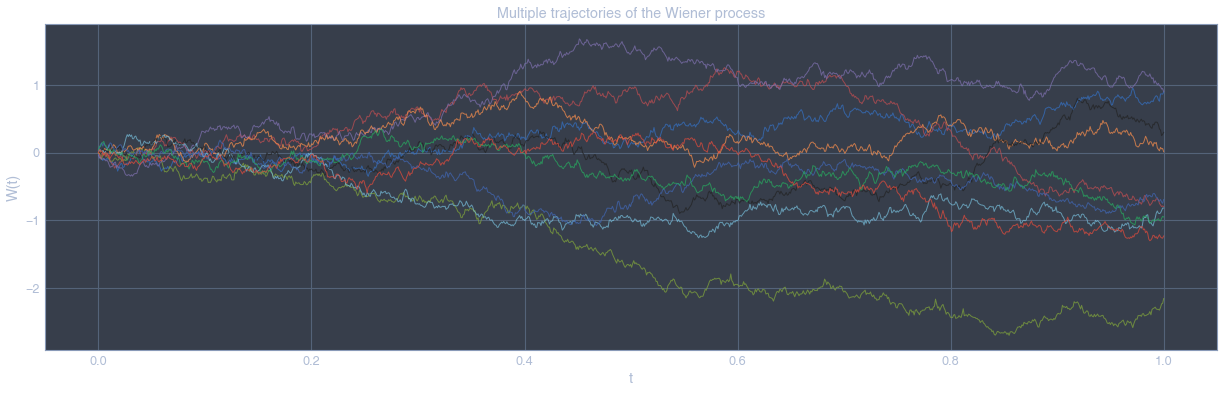

In [3]:
def multiple_wiener_paths(n_paths=5, T=1, N=1_000):
    """Генерация нескольких траекторий винеровского процесса"""
    dt = T / N
    t = np.linspace(0, T, N)
    
    paths = np.zeros((n_paths, N))
    for i in range(n_paths):
        _, paths[i] = wiener_process(T, N)
#     for i in range(n_paths):
#         dW = np.random.normal(0, np.sqrt(dt), N)
#         paths[i] = np.cumsum(dW)
    
    return t, paths


t, paths = multiple_wiener_paths(n_paths=10, T=1, N=1_000)

plt.figure(figsize=(21, 6))
for i in range(len(paths)):
    plt.plot(t, paths[i], alpha=0.7, linewidth=1)

plt.title('Multiple trajectories of the Wiener process')
plt.xlabel('t')
plt.ylabel('W(t)')

print('Statistical properties at the moment T=1:')
print(f'Mean: {np.mean(paths[:, -1]):.4f}')
print(f'Variance: {np.var(paths[:, -1]):.4f}')

In [3]:
def verify_wiener_properties(n_simulations=1_000, T=1, N=1_000):
    """ CHECKING THE PROPERTIES OF THE WIENER PROCESS """
    increments = []
    values_at_1 = []
    for _ in range(n_simulations):
        t, W = wiener_process(T=T, N=N)
        values_at_1.append(W[-1])
        increments.append((W[250] - W[0], W[-1] - W[750]))
    
    increments = np.array(increments)

    print('=== CHECKING THE PROPERTIES OF THE WIENER PROCESS ===')
    print(f'Number of simulations: {n_simulations}')
    
    # 1. W(0) = 0
    print('\t1. W(0) = 0: ✓ (by default)')
    
    # 2. E[W(t)] = 0
    mean_W1 = np.mean(values_at_1)
    print(f'\t2. E[W(1)] = {mean_W1:.4f} (theoretically 0)')
    
    # 3. Var[W(t)] = t
    var_W1 = np.var(values_at_1)
    print(f'\t3. Var[W(1)] = {var_W1:.4f} (theoretically 1)')
    
    # 4. Independent increments
    correlation = np.corrcoef(increments[:, 0], increments[:, 1])[0, 1]
    print(f'\t4. Correlation of Independent Increments: {correlation:.4f} (theoretically 0)')
    
    # 5. Normality of increments
    _, p_value = stats.normaltest(values_at_1)
    print(f'\t5. Normality test (p-value): {p_value:.4f}')


verify_wiener_properties(n_simulations=1_000)

=== CHECKING THE PROPERTIES OF THE WIENER PROCESS ===
Number of simulations: 1000
	1. W(0) = 0: ✓ (by default)
	2. E[W(1)] = -0.0151 (theoretically 0)
	3. Var[W(1)] = 1.0414 (theoretically 1)
	4. Correlation of Independent Increments: -0.0093 (theoretically 0)
	5. Normality test (p-value): 0.5614


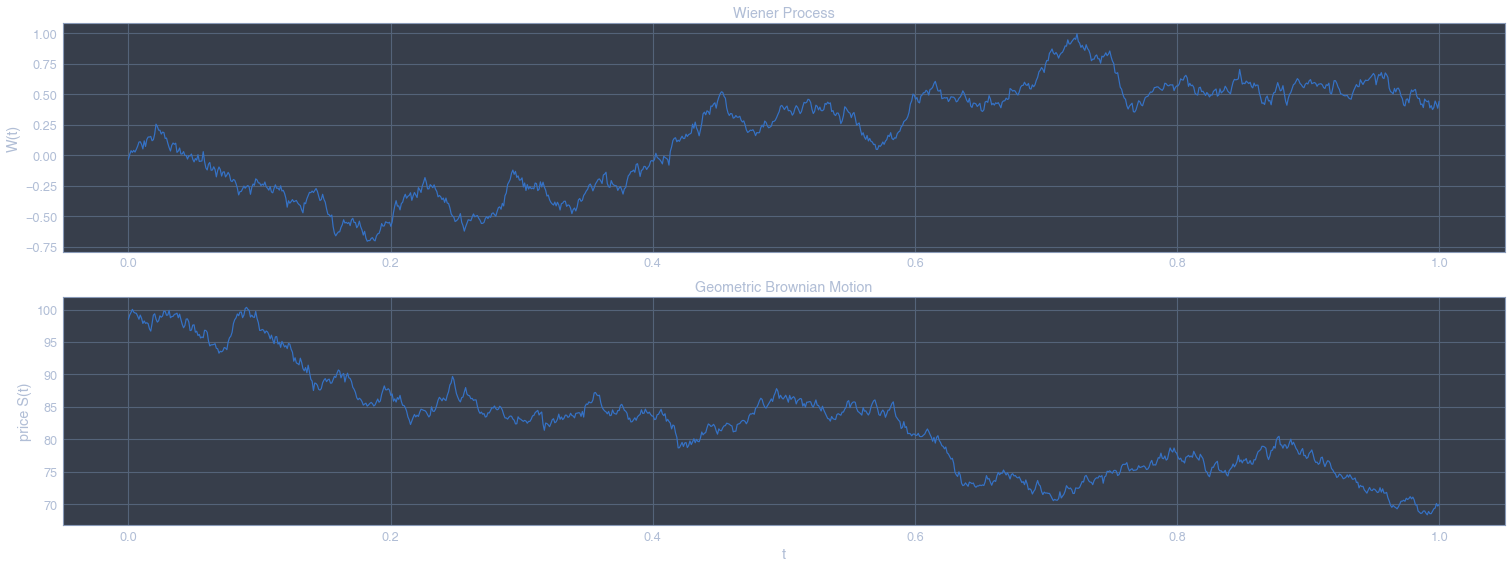

In [7]:
def geometric_brownian_motion(S0=100, mu=0.05, sigma=0.2, T=1, N=1000):
    """
    Geometric Brownian Motion
    for Black-Scholes Model
    """
    dt = T / N
    t = np.linspace(0, T, N)
    
    # Винеровский процесс
    dW = np.random.normal(0, np.sqrt(dt), N)
    W = np.cumsum(dW)
    
    # Геометрическое броуновское движение
    S = S0*np.exp((mu - 0.5 * sigma**2)*t + sigma*W)
    
    return t, S

# Сравнение винеровского процесса и GBM
t_wiener, W = wiener_process(T=1, N=1000)
t_gbm, S = geometric_brownian_motion(S0=100, mu=0.05, sigma=0.2, T=1, N=1000)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(21, 8))

ax1.plot(t_wiener, W)
ax1.set_title('Wiener Process')
ax1.set_ylabel('W(t)')

ax2.plot(t_gbm, S)
ax2.set_title('Geometric Brownian Motion')
ax2.set_xlabel('t')
ax2.set_ylabel('price S(t)')

plt.tight_layout()

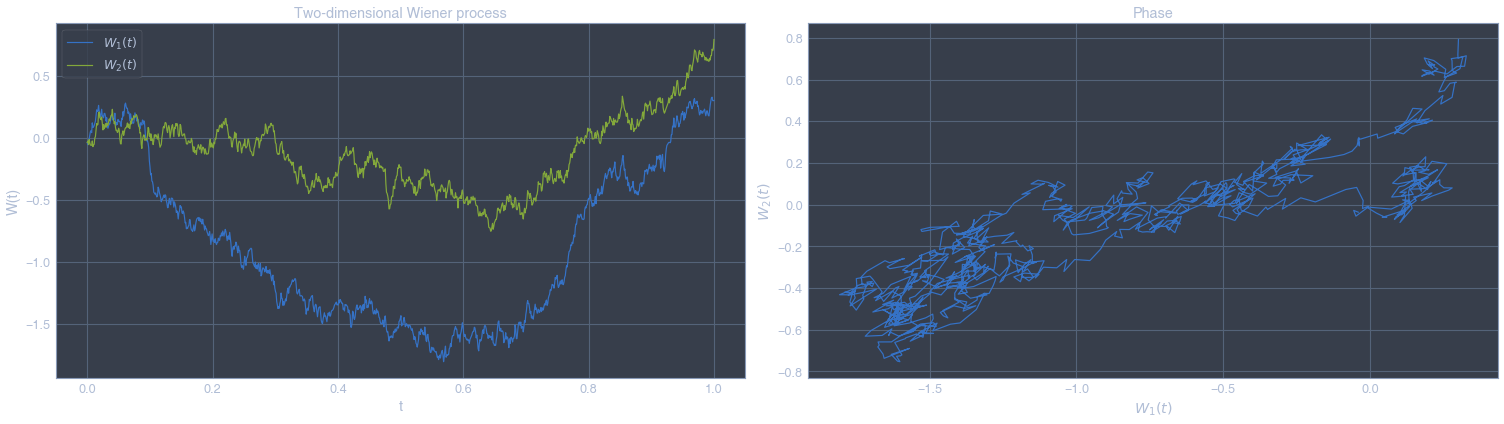

In [12]:
def multivariate_wiener_process(dim=2, T=1, N=1000, rho=0.3):
    """Многомерный винеровский процесс с корреляцией"""
    dt = T / N
    t = np.linspace(0, T, N)
    
    # Ковариационная матрица
    cov_matrix = np.eye(dim) * (1 - rho) + np.ones((dim, dim)) * rho
    
    # Холецкое разложение для коррелированных приращений
    L = np.linalg.cholesky(cov_matrix)
    
    # Генерация независимых приращений
    dW_independent = np.random.normal(0, np.sqrt(dt), (N, dim))
    
    # Преобразование к коррелированным
    dW_correlated = dW_independent @ L.T

    W = np.cumsum(dW_correlated, axis=0)
    
    return t, W

# Генерация двумерного процесса
t, W_2d = multivariate_wiener_process(dim=2, T=1, N=1000, rho=0.5)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(21, 6))

ax1.plot(t, W_2d[:, 0], label='$W_1(t)$')
ax1.plot(t, W_2d[:, 1], label='$W_2(t)$')
ax1.set_title('Two-dimensional Wiener process')
ax1.set_xlabel('t')
ax1.set_ylabel('W(t)')
ax1.legend()

ax2.plot(W_2d[:, 0], W_2d[:, 1])
ax2.set_title('Phase')
ax2.set_xlabel('$W_1(t)$')
ax2.set_ylabel('$W_2(t)$')

plt.tight_layout()

## #2. Poisson Process

All events: 27
Time: [0.20721031 0.2439146  0.63930927 1.18636301 1.29174451 1.33072389
 2.07305241 2.45700215 2.55090448 2.69385856]


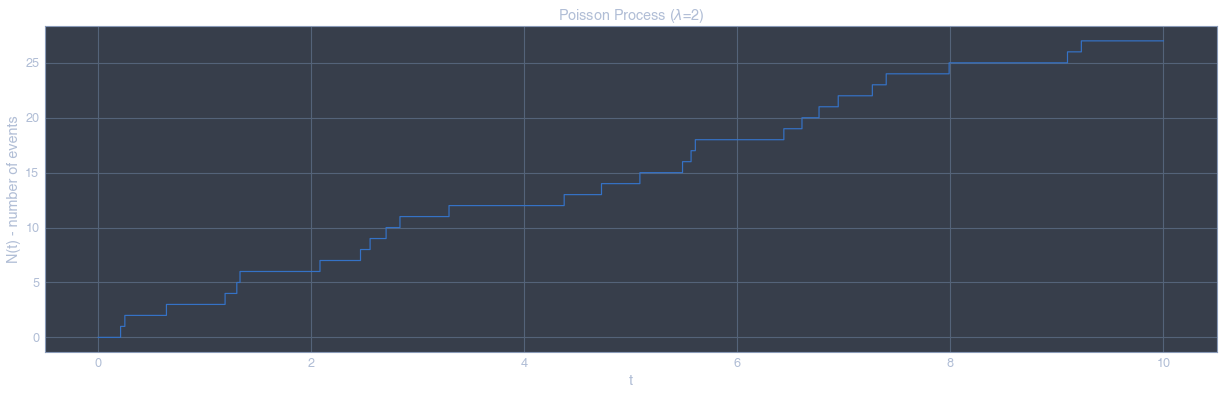

In [3]:
def poisson_process(λ=1, T=10): # \lambda + TAB
    # Время между событиями распределено экспоненциально
    times = []
    current_time = 0
    
    while current_time < T:
        # Время до следующего события
        interarrival = np.random.exponential(1/λ)
        current_time += interarrival
        
        if current_time < T:
            times.append(current_time)
    
    # Количество событий в каждый момент времени
    t_values = np.linspace(0, T, 1000)
    counts = [len([t for t in times if t <= t_val]) for t_val in t_values]
    
    return np.array(times), t_values, np.array(counts)

event_times, t_values, counts = poisson_process(λ=2, T=10)

plt.figure(figsize=(21, 6))
plt.step(t_values, counts, where='post')
plt.title('Poisson Process ($\lambda$=2)')
plt.xlabel('t')
plt.ylabel('N(t) - number of events')

print(f"All events: {len(event_times)}")
print(f"Time: {event_times[:10]}")

Properties in T=10:
Number of Events: 11.50
Mean: 10.00
Variance: 9.85
Theory Variance: 10.00


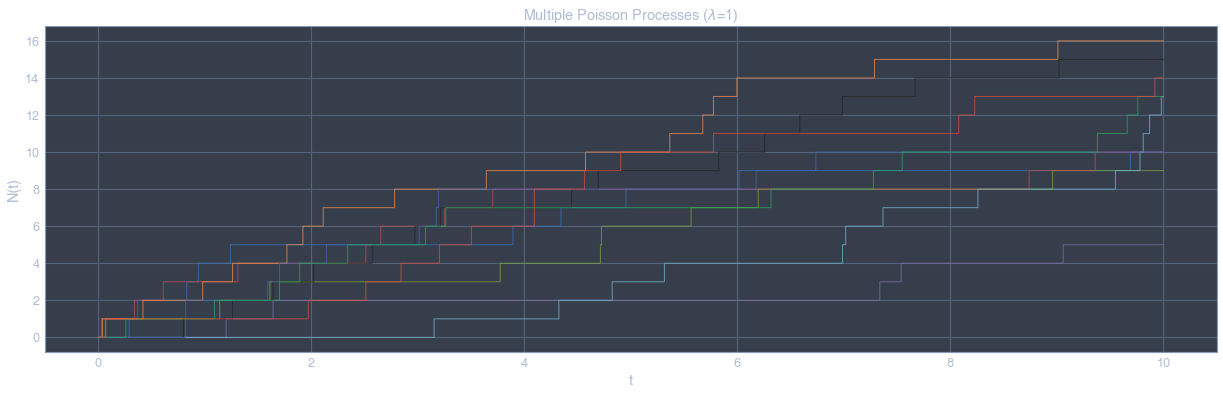

In [5]:
def multiple_poisson_paths(n_paths=5, lambd=1, T=10):
    """ Multiple Poisson Processes """
    all_paths = []
    all_event_times = []
    
    for i in range(n_paths):
        event_times, t_values, counts = poisson_process(lambd, T)
        all_paths.append((t_values, counts))
        all_event_times.append(event_times)
    
    return all_paths, all_event_times


paths, event_times_list = multiple_poisson_paths(n_paths=10, lambd=1, T=10)

plt.figure(figsize=(21, 6))
for t_values, counts in paths:
    plt.step(t_values, counts, where='post', alpha=0.7, linewidth=1)

plt.title('Multiple Poisson Processes ($\lambda$=1)')
plt.xlabel('t')
plt.ylabel('N(t)')

final_counts = [counts[-1] for _, counts in paths]
print('Properties in T=10:')
print(f'Number of Events: {np.mean(final_counts):.2f}')
print(f'Mean: {1 * 10:.2f}')
print(f'Variance: {np.var(final_counts):.2f}')
print(f'Theory Variance: {1 * 10:.2f}')

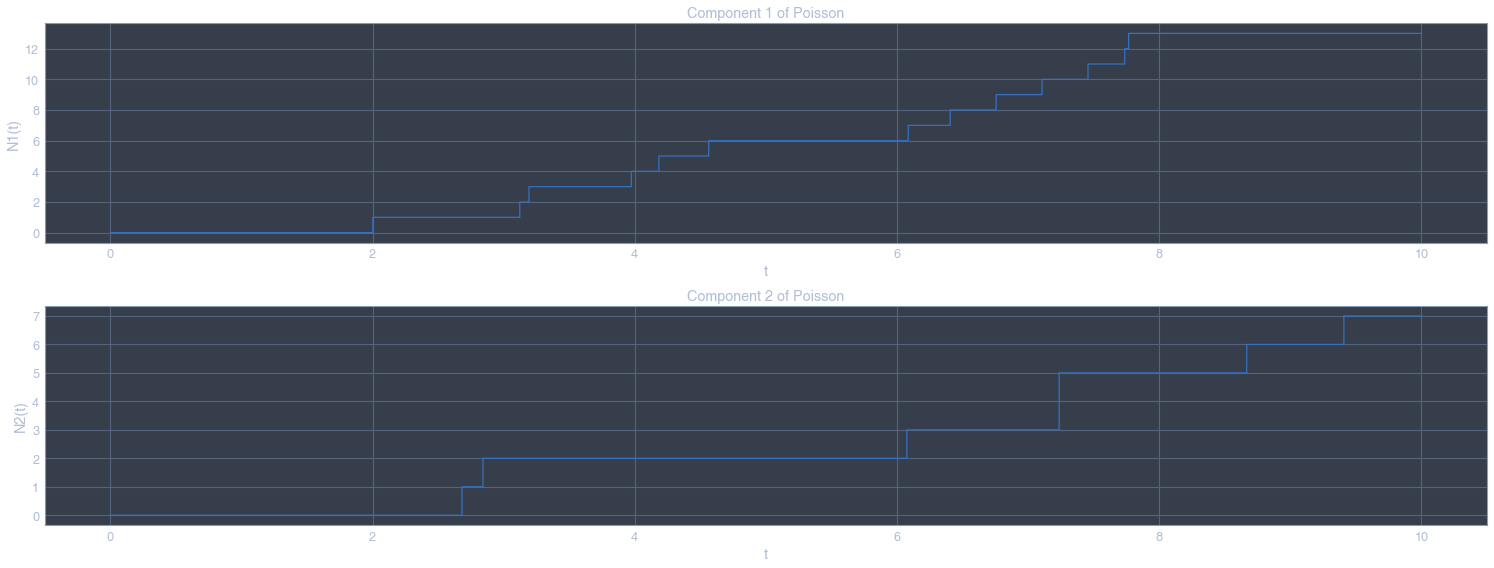

In [10]:
def multivariate_poisson_process(dim=2, λ=1, T=10, correlation=0):
    """
    Многомерный процесс Пуассона
    
    Parameters:
    dim - размерность
    λ - интенсивность каждого компонента
    T - временной горизонт
    correlation - корреляция между компонентами
    """
    processes = []
    
    for i in range(dim):
        if correlation == 0:
            # Независимые процессы
            events, t_values, counts = poisson_process(λ, T)
        else:
            # Зависимые процессы (упрощенная реализация)
            base_events, _, _ = poisson_process(λ*(1 - correlation), T)
            common_events, _, _ = poisson_process(λ*correlation, T)
            events = np.sort(np.concatenate([base_events, common_events]))
            events = events[events < T]
            
            t_values = np.linspace(0, T, 1000)
            counts = np.array([len([t for t in events if t <= t_val]) for t_val in t_values])
        
        processes.append((events, t_values, counts))
    
    return processes

processes_2d = multivariate_poisson_process(dim=2, λ=1, T=10, correlation=0.3)

plt.figure(figsize=(21, 8))
for i, (events, t_values, counts) in enumerate(processes_2d):
    plt.subplot(2, 1, i+1)
    plt.step(t_values, counts, where='post')
    plt.title(f'Component {i+1} of Poisson')
    plt.xlabel('t')
    plt.ylabel(f'N{i+1}(t)')

plt.tight_layout()